# Groupby operations

Some imports:

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
try:
    import seaborn
except ImportError:
    pass

pd.options.display.max_rows = 10

## Recap: the groupby operation (split-apply-combine)

The "group by" concept: we want to **apply the same function on subsets of your dataframe, based on some key to split the dataframe in subsets**

This operation is also referred to as the "split-apply-combine" operation, involving the following steps:

* **Splitting** the data into groups based on some criteria
* **Applying** a function to each group independently
* **Combining** the results into a data structure

<img src="img/splitApplyCombine.png">

Similar to SQL `GROUP BY`

The example of the image in pandas syntax:

In [2]:
df = pd.DataFrame({'key':['A','B','C','A','B','C','A','B','C'],
                   'data': [0, 5, 10, 5, 10, 15, 10, 15, 20]})
df

,data,key
0,0,A
1,5,B
2,10,C
3,5,A
4,10,B
5,15,C
6,10,A
7,15,B
8,20,C


Using the filtering and reductions operations we have seen in the previous notebooks, we could do something like:


    df[df['key'] == "A"].sum()
    df[df['key'] == "B"].sum()
    ...

But pandas provides the `groupby` method to do this:

In [3]:
df.groupby('key').aggregate('sum')  # np.sum

,data
key,
A,15
B,30
C,45


In [4]:
df.groupby('key').sum()

,data
key,
A,15
B,30
C,45


Pandas does not only let you group by a column name. In `df.groupby(grouper)` can be many things:

- Series (or string indicating a column in df)
- function (to be applied on the index)
- dict : groups by values
- levels=[], names of levels in a MultiIndex



In [5]:
df.groupby(lambda x: x % 2).mean()

,data
0,10
1,10


## And now applying this on some real data

These exercises are based on the [PyCon tutorial of Brandon Rhodes](https://github.com/brandon-rhodes/pycon-pandas-tutorial/) (so all credit to him!) and the datasets he prepared for that. You can download these data from here: [`titles.csv`](https://drive.google.com/open?id=0B3G70MlBnCgKajNMa1pfSzN6Q3M) and [`cast.csv`](https://drive.google.com/open?id=0B3G70MlBnCgKal9UYTJSR2ZhSW8) and put them in the `/data` folder.

`cast` dataset: different roles played by actors/actresses in films

- title: title of the film
- name: name of the actor/actress
- type: actor/actress
- n: the order of the role (n=1: leading role)

In [6]:
cast = pd.read_csv('data/cast.csv')
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27.0
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3.0
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


In [7]:
titles = pd.read_csv('data/titles.csv')
titles.head()

,title,year
0,The Rising Son,1990
1,Ashes of Kukulcan,2016
2,The Thousand Plane Raid,1969
3,Crucea de piatra,1993
4,The 86,2015


<div class="alert alert-success">
    <b>EXERCISE</b>: Using groupby(), plot the number of films that have been released each decade in the history of cinema.
</div>

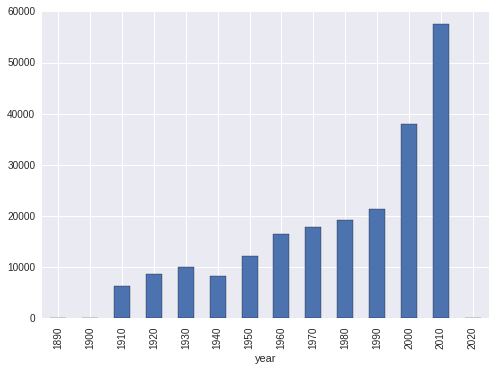

In [8]:
titles.groupby(titles.year // 10 * 10).size().plot(kind='bar')

<div class="alert alert-success">
    <b>EXERCISE</b>: Use groupby() to plot the number of "Hamlet" films made each decade.
</div>

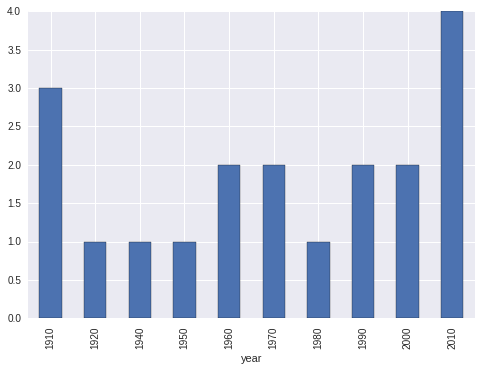

In [9]:
hamlet = titles[titles['title'] == 'Hamlet']
hamlet.groupby(hamlet.year // 10 * 10).size().plot(kind='bar')

<div class="alert alert-success">
    <b>EXERCISE</b>: How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?
</div>

In [10]:
cast1950 = cast[cast.year // 10 == 195]
cast1950 = cast1950[cast1950.n == 1]
cast1950.groupby(['year', 'type']).size()

year  type   
1950  actor      604
      actress    271
1951  actor      633
      actress    272
1952  actor      591
                ... 
1957  actress    284
1958  actor      694
      actress    275
1959  actor      678
      actress    287
dtype: int64

<div class="alert alert-success">
    <b>EXERCISE</b>: List the 10 actors/actresses that have the most leading roles (n=1) since the 1990's.
</div>

In [11]:
cast1990 = cast[cast['year'] >= 1990]
cast1990 = cast1990[cast1990.n == 1]
cast1990.groupby('name').size().nlargest(10)

name
Mohanlal              126
Mammootty             118
Akshay Kumar           87
Jayaram                76
Andy Lau               72
Ajay Devgn             69
Amitabh Bachchan       68
Eric Roberts           68
Nagarjuna Akkineni     60
Dilip                  59
dtype: int64

<div class="alert alert-success">
    <b>EXERCISE</b>: Use groupby() to determine how many roles are listed for each of The Pink Panther movies.
</div>

In [12]:
c = cast
c = c[c.title == 'The Pink Panther']
c = c.groupby(['year'])[['n']].max()
c

,n
year,
1963,15.0
2006,50.0


<div class="alert alert-success">
    <b>EXERCISE</b>: List, in order by year, each of the films in which Frank Oz has played more than 1 role.
</div>

In [13]:
c = cast
c = c[c.name == 'Frank Oz']
g = c.groupby(['year', 'title']).size()
g[g > 1]

year  title                                   
1979  The Muppet Movie                            8
1981  An American Werewolf in London              2
      The Great Muppet Caper                      6
1982  The Dark Crystal                            2
1984  The Muppets Take Manhattan                  7
1985  Sesame Street Presents: Follow that Bird    3
1992  The Muppet Christmas Carol                  7
1996  Muppet Treasure Island                      4
1999  Muppets from Space                          4
      The Adventures of Elmo in Grouchland        3
dtype: int64

<div class="alert alert-success">
    <b>EXERCISE</b>: List each of the characters that Frank Oz has portrayed at least twice.
</div>

In [15]:
c = cast
c = c[c.name == 'Frank Oz']
g = c.groupby(['character']).size()
g[g > 1].sort_values()

character
Grover            2
Bert              3
Cookie Monster    3
Fozzie Bear       4
Sam the Eagle     5
Yoda              5
Animal            6
Miss Piggy        6
dtype: int64

## Transforms

Sometimes you don't want to aggregate the groups, but transform the values in each group. This can be achieved with `transform`:

In [16]:
df

,data,key
0,0,A
1,5,B
2,10,C
3,5,A
4,10,B
5,15,C
6,10,A
7,15,B
8,20,C


In [17]:
df.groupby('key').transform('mean')

,data
0,5
1,10
2,15
3,5
4,10
5,15
6,5
7,10
8,15


In [18]:
def normalize(group):
    return (group - group.mean()) / group.std()

In [19]:
df.groupby('key').transform(normalize)

,data
0,-1.0
1,-1.0
2,-1.0
3,0.0
4,0.0
5,0.0
6,1.0
7,1.0
8,1.0


In [20]:
df.groupby('key').transform('sum')

,data
0,15
1,30
2,45
3,15
4,30
5,45
6,15
7,30
8,45


<div class="alert alert-success">
    <b>EXERCISE</b>: Add a column to the `cast` dataframe that indicates the number of roles for the film.
</div>

In [21]:
cast['n_total'] = cast.groupby('title')['n'].transform('max')
cast.head()

,title,year,name,type,character,n,n_total
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0,22.0
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27.0,45.0
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3.0,9.0
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN,NaN


<div class="alert alert-success">
    <b>EXERCISE</b>: Calculate the ratio of leading actor and actress roles to the total number of leading roles per decade.     
</div>

Tip: you can to do a groupby twice in two steps,  once calculating the numbers, and then the ratios.

In [22]:
leading = cast[cast['n'] == 1]
sums_decade = leading.groupby([cast['year'] // 10 * 10, 'type']).size()
sums_decade

year  type   
1900  actor          5
      actress        1
1910  actor       2406
      actress     2753
1920  actor       4485
                 ...  
2000  actress     7537
2010  actor      17262
      actress     7384
2020  actor          3
      actress        1
dtype: int64

In [23]:
#sums_decade.groupby(level='year').transform(lambda x: x / x.sum())
ratios_decade = sums_decade / sums_decade.groupby(level='year').transform('sum')
ratios_decade

year  type   
1900  actor      0.833333
      actress    0.166667
1910  actor      0.466369
      actress    0.533631
1920  actor      0.598080
                   ...   
2000  actress    0.295464
2010  actor      0.700398
      actress    0.299602
2020  actor      0.750000
      actress    0.250000
dtype: float64

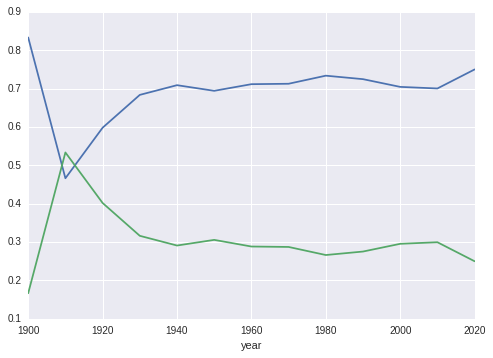

In [24]:
ratios_decade[:, 'actor'].plot()
ratios_decade[:, 'actress'].plot()

## Intermezzo: string manipulations

Python strings have a lot of useful methods available to manipulate or check the content of the string:

In [25]:
s = 'Bradwurst'

In [26]:
s.startswith('B')

True

In pandas, those methods (together with some additional methods) are also available for string Series through the `.str` accessor:

In [27]:
s = pd.Series(['Bradwurst', 'Kartoffelsalat', 'Sauerkraut'])

In [28]:
s.str.startswith('B')

0     True
1    False
2    False
dtype: bool

For an overview of all string methods, see: http://pandas.pydata.org/pandas-docs/stable/api.html#string-handling

<div class="alert alert-success">
    <b>EXERCISE</b>: We already plotted the number of 'Hamlet' films released each decade, but not all titles are exactly called 'Hamlet'. Give an overview of the titles that contain 'Hamlet', and that start with 'Hamlet':
</div>

In [29]:
hamlets = titles[titles['title'].str.contains('Hamlet')]
hamlets['title'].value_counts()

Hamlet                                 19
Hamlet (II)                             5
Hamlet (III)                            2
Han, hun og Hamlet                      2
Fuck Hamlet                             1
                                       ..
Hamlet: Prince of Denmark               1
Zombie Hamlet                           1
Hamlet_X                                1
Dogg's Hamlet, Cahoot's Macbeth         1
Predstava 'Hamleta' u Mrdusi Donjoj     1
Name: title, dtype: int64

In [30]:
hamlets = titles[titles['title'].str.match('Hamlet')]
hamlets['title'].value_counts()

Hamlet                           19
Hamlet (II)                       5
Hamlet (III)                      2
Hamlet the Vampire Slayer         1
Hamlet's Ghost                    1
                                 ..
Hamlet: Prince of Denmark         1
Hamlet (A Modern Adaptation)      1
Hamlet_X                          1
Hamlet: The Fall of a Sparrow     1
Hamlet in the Hamptons            1
Name: title, dtype: int64

<div class="alert alert-success">
    <b>EXERCISE</b>: List the 10 movie titles with the longest name.
</div>

In [31]:
title_longest = titles['title'].str.len().nlargest(10)
title_longest

127048    208
28483     196
103597    116
8396      114
85693     104
108020    104
206303    101
122757     99
52929      94
187654     92
Name: title, dtype: int64

In [32]:
pd.options.display.max_colwidth = 210
titles.loc[title_longest.index]

,title,year
127048,"Night of the Day of the Dawn of the Son of the Bride of the Return of the Revenge of the Terror of the Attack of the Evil Mutant Hellbound Flesh Eating Crawling Alien Zombified Subhumanoid Living Dead, Part 5",2011
28483,"Night of the Day of the Dawn of the Son of the Bride of the Return of the Revenge of the Terror of the Attack of the Evil, Mutant, Hellbound, Flesh-Eating Subhumanoid Zombified Living Dead, Part 3",2005
103597,Maverick and Ariel's First Ever Ever Movie Hollywood or Else... (Ang pinakamahabang title ng movie sa balat ng lupa),2010
8396,The Fable of the Kid Who Shifted His Ideals to Golf and Finally Became a Baseball Fan and Took the Only Known Cure,1916
85693,"Film d'amore e d'anarchia, ovvero 'stamattina alle 10 in via dei Fiori nella nota casa di tolleranza...'",1973
108020,Those Magnificent Men in Their Flying Machines or How I Flew from London to Paris in 25 hours 11 minutes,1965
206303,Ontologica! or a Brief Explanation of Absolutely Everything that is Known about Absolutely Everything,2012
122757,The Official Motion Pictures of the Heavyweight Boxing Contest Between Gene Tunney and Jack Dempsey,1927
52929,Something Strange: 23 Peculiar Perspectives of Metaphysical Phenomena in a Modern American Age,2012
187654,"The Personal History, Adventures, Experience, & Observation of David Copperfield the Younger",1935


## Value counts

A useful shortcut to calculate the number of occurences of certain values is `value_counts` (this is somewhat equivalent to `df.groupby(key).size())`)

For example, what are the most occuring movie titles?

In [33]:
titles.title.value_counts().head()

Hamlet                  19
Macbeth                 14
Carmen                  14
The Three Musketeers    12
She                     11
Name: title, dtype: int64

<div class="alert alert-success">
    <b>EXERCISE</b>: Which years saw the most films released?
</div>

In [34]:
t = titles
t.year.value_counts().head(3)

2015    13978
2014     8209
2013     7664
Name: year, dtype: int64

<div class="alert alert-success">
    <b>EXERCISE</b>: Plot the number of released films over time
</div>

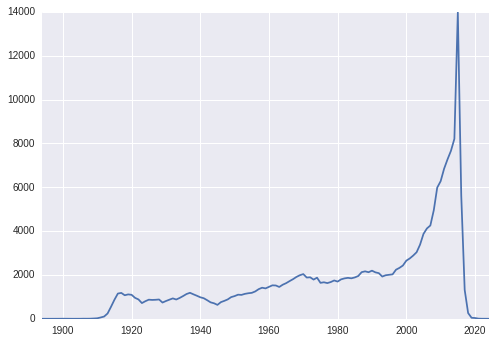

In [35]:
titles.year.value_counts().sort_index().plot()

<div class="alert alert-success">
    <b>EXERCISE</b>: Plot the number of "Hamlet" films made each decade.
</div>

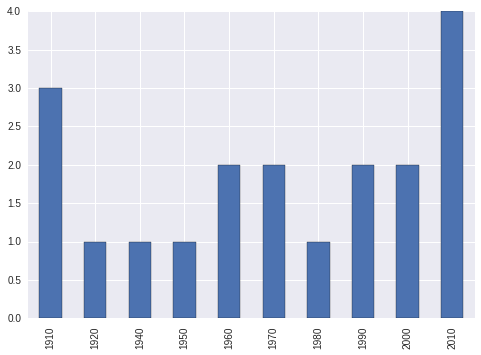

In [36]:
t = titles
t = t[t.title == 'Hamlet']
(t.year // 10 * 10).value_counts().sort_index().plot(kind='bar')

<div class="alert alert-success">
    <b>EXERCISE</b>: What are the 11 most common character names in movie history?
</div>

In [37]:
cast.character.value_counts().head(11)

Himself        18928
Dancer         11070
Extra           9141
Reporter        7646
Doctor          6846
               ...  
Student         6406
Bartender       6178
Nurse           6164
Party Guest     5917
Minor Role      5880
Name: character, dtype: int64

<div class="alert alert-success">
    <b>EXERCISE</b>: Which actors or actresses appeared in the most movies in the year 2010?
</div>

In [38]:
cast[cast.year == 2010].name.value_counts().head(10)

Lloyd Kaufman           23
Jagathi Sreekumar       20
Suraaj Venjarammoodu    20
Chris (II) Eddy         20
Danny Trejo             17
Matt Simpson Siegel     17
Brahmanandam            15
Joe Estevez             15
Ben (II) Bishop         15
Kyle Rea                15
Name: name, dtype: int64

<div class="alert alert-success">
    <b>EXERCISE</b>: Plot how many roles Brad Pitt has played in each year of his career.
</div>

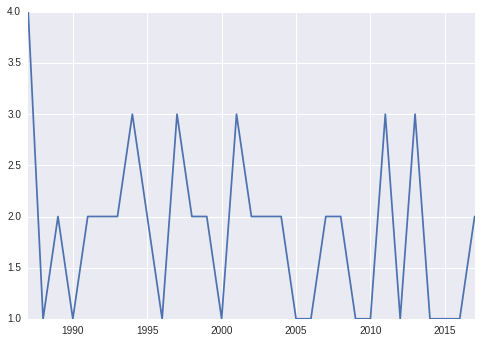

In [39]:
cast[cast.name == 'Brad Pitt'].year.value_counts().sort_index().plot()

<div class="alert alert-success">
    <b>EXERCISE</b>: What are the 10 most film titles roles that start with the word "The Life"?
</div>

In [40]:
c = cast
c[c.title.str.startswith('The Life')].title.value_counts().head(10)

The Life of David Gale                      137
The Life Aquatic with Steve Zissou           78
The Life Before Her Eyes                     74
The Life of Riley                            73
The Life and Death of Peter Sellers          65
The Life and Death of Colonel Blimp          58
The Life and Hard Times of Guy Terrifico     53
The Life and Times of Judge Roy Bean         50
The Life of Emile Zola                       46
The Life of the Party                        45
Name: title, dtype: int64

<div class="alert alert-success">
    <b>EXERCISE</b>: How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s? And in 2000s?
</div>

In [41]:
c = cast
c = c[c.year // 10 == 195]
c = c[c.n == 1]
c.type.value_counts()

actor      6388
actress    2813
Name: type, dtype: int64

In [42]:
c = cast
c = c[c.year // 10 == 200]
c = c[c.n == 1]
c.type.value_counts()

actor      17972
actress     7537
Name: type, dtype: int64